## Lagrange interpolation

Given $(n+1)$ distinct points $\{X_i\}_{i=0}^n$ in the interval $[0,1]$,
we define the *Lagrange interpolation* operator $\mathcal{L}^n$ the operator
$$
\mathcal{L}^n : C^0([0,1]) \mapsto \mathcal{P}^n
$$
defined as
$$
(\mathcal{L}^n f)(x) = \sum_{i=0}^n f(X_i)\ell_i(x), \qquad i=0,\dots,n.
$$
with 
$$
\ell_i(x) := \prod_{i\neq j, j=0}^n \frac{(x-x_j)}{(x_i-x_j)}
$$

In [1]:
# The following line will import all numpy and matplotlib, so that everything we do later can be done 
# without the "np." prefix
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# use x to plot and to compute approximate l_infty norms
x = linspace(0,1,125)
# use X as interpolation points (take n of them)
n = 5
X = linspace(0,1,n)

In [3]:
def elegant_lagrange(x, i, X):
    """
    Returns the ith Lagrange basis function, evaluated at x, 
    generated by the interpolation points X
    """
    return prod([(x-X[j])/(X[i]-X[j]) for j in range(len(X)) if i != j], axis=0)

def fast_lagrange(x, i, X):             
    """
    Returns the ith Lagrange basis function, evaluated at x, 
    generated by the interpolation points X
    """
    ret = x*0+1 # ones_like(x)
    for j in range(len(X)):
        if i != j:
             ret = ret*(x-X[j])/(X[i]-X[j])
    return ret

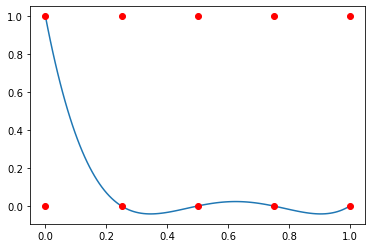

In [4]:
l0 = elegant_lagrange(x, 0, X)
plot(x,l0)
plot(X, X*0+1, 'ro')
plot(X, X*0, 'ro')

Now we compute 

$$
V_{ij} := \ell_j(x_i)
$$
with this matrix, we can compute 

$$
(\mathcal L^n u)(x_i) := \sum_{j=0}^n u(X_j) \ell_j(x_i) = \sum_j V_{ij}u(X_j)
$$

This is 

```
V.dot(u(X))
```

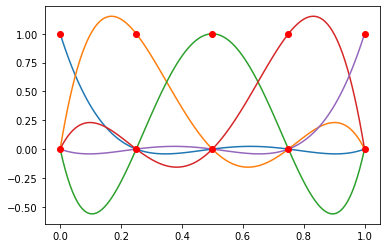

In [5]:
V = array([elegant_lagrange(x, i, X) for i in range(len(X))]).T

plot(x, V)
plot(X, X*0+1, 'ro')
plot(X, X*0, 'ro')

In [6]:
def runge(x):
    return 1/(1+100*(x-.5)**2)

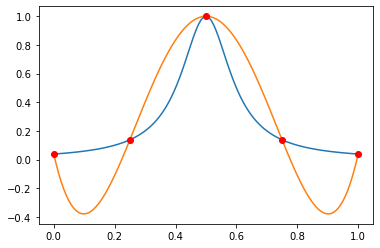

In [7]:
plot(x, runge(x))
plot(x, V.dot(runge(X)))
plot(X, runge(X), 'ro')

In [8]:
from numpy.polynomial import chebyshev
X, w = chebyshev.chebgauss(n)

In [9]:
X = (X+1)/2
X

array([0.97552826, 0.79389263, 0.5       , 0.20610737, 0.02447174])

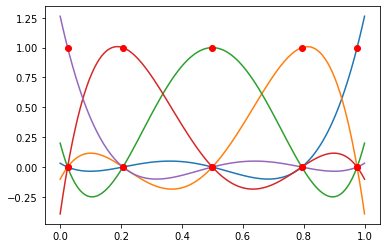

In [10]:
plot(X, X*0, 'ro')
V = array([elegant_lagrange(x, i, X) for i in range(len(X))]).T

plot(x, V)
plot(X, X*0+1, 'ro')
plot(X, X*0, 'ro')

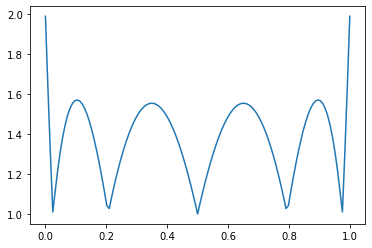

In [11]:
lebesgue = sum(abs(V),axis=1)
plot(x, lebesgue)

Let's check our theorems

In [12]:
import sympy as sym
s = sym.var('s')
r = runge(s)

In [13]:
upper_bound = r.diff(s, n+1)

In [14]:
upper_bound_lambda = sym.lambdify(s, upper_bound)

In [15]:
max(upper_bound_lambda(x))

381040790.35291535

In [16]:
def compute_error(x, u, range_of_n):
    error = []
    lebesgue = []
    for n in range_of_n:
        # compute the chebyshev points
        X, w = chebyshev.chebgauss(n)
        X = (X+1)/2
        # X = linspace(0,1,n) # Uncomment this, to try with equispaced.
        # Compute the basis functions
        V = array([elegant_lagrange(x, i, X) for i in range(len(X))]).T
        lebesgue_norm = max(sum(abs(V),axis=1))
        error_u = u(x) - V.dot(u(X))
        error_norm = max(abs(error_u))
        error.append(error_norm)
        lebesgue.append(lebesgue_norm)
    return error, lebesgue

In [17]:
N = list(range(5,125))
e, l = compute_error(x, runge, N)

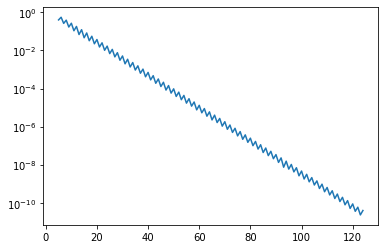

In [18]:
semilogy(N, e)

In [19]:
def my_fun(x):
    return sin(2*pi*x)

In [20]:
esin, lsin = compute_error(x, my_fun, N)

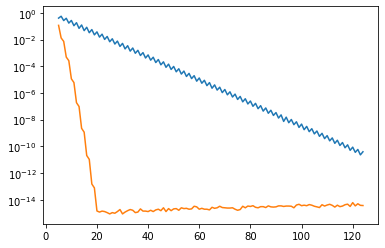

In [21]:
semilogy(N, e)
semilogy(N, esin)